In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git-repos/floto-tavi-outcome-prediction


In [2]:
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
exp_root = Path('./experiments')
metrics = {}
for metrics_path in exp_root.glob('local_HP*/*/metrics.pt'):
    print(metrics_path)
    exp_name = metrics_path.parents[1].name
    exp_metrics = torch.load(metrics_path)
    metrics[exp_name] = exp_metrics

experiments/local_HP_SwinUNeTr_conditioned/1700376155/metrics.pt
experiments/local_HP_nnUNet_conditioned/1700278005/metrics.pt
experiments/local_HP_nnUNet/1700230024/metrics.pt
experiments/local_HP_SwinUNeTr/1700325730/metrics.pt
experiments/local_HP_SwinUNeTr_pretrained/1700426991/metrics.pt
experiments/local_HP_SwinUNeTr_pretrained_conditioned/1700478331/metrics.pt


In [27]:
names = {
    'local_HP_nnUNet': r'$\mathrm{nnUNet}$',
    'local_HP_nnUNet_conditioned': r'$\mathrm{nnUNet}_{\mathrm{c}}$',
    'local_HP_SwinUNeTr': r'$\mathrm{SwinUNeTr}$',
    'local_HP_SwinUNeTr_conditioned': r'$\mathrm{SwinUNeTr}_{\mathrm{c}}$',
    # 'local_HP_SwinUNeTr_pretrained': r'$\mathrm{SwinUNeTr}_{\mathrm{p}}$',
    # 'local_HP_SwinUNeTr_pretrained_conditioned': r'$\mathrm{SwinUNeTr}_{\mathrm{c,p}}$',
}

(-0.9726601294026925, 1.2085728226372827)

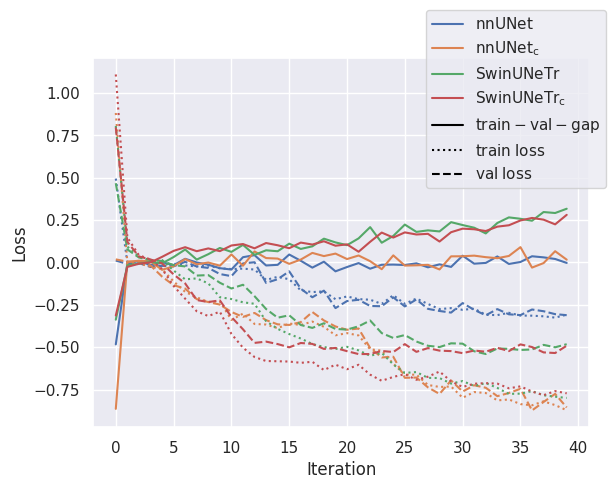

In [42]:
cp = sns.color_palette()
fig, ax = plt.subplots()
# for i, (n, m) in enumerate(metrics.items()):
for i, (n, l) in enumerate(names.items()):
    # n = n.split('_')
    # if n == ''
    # n = fr'$\mathrm{{n[2]}}$'
    m = metrics[n]
    tl = np.array(m['train_loss'])
    vl = np.array(m['val_loss'])
    ax.plot(tl[::5], color=cp[i], linestyle='dotted')
    ax.plot(vl[::5], color=cp[i], linestyle='dashed')
    ax.plot((vl - tl)[::5], color=cp[i], label=l)

ylim = ax.get_ylim()
ax.plot([1,2],[-10,-10], label=r'$\mathrm{train-val-gap}$', color='black')
ax.plot([1,2],[-10,-10], label=r'$\mathrm{train}\;\mathrm{loss}$', linestyle='dotted', color='black')
ax.plot([1,2],[-10,-10], label=r'$\mathrm{val}\;\mathrm{loss}$', linestyle='dashed', color='black')
ax.legend(bbox_to_anchor=(1.05,1.15))
ax.set_ylabel(r'Loss')
ax.set_xlabel(r'Iteration')
ax.set_ylim(ylim)